# Exercise 6.5 Unsupervised Machine Learning

In this exercise:

Section 1 - Loading Libraries and Data

Section 2 - Using the Elbow Technique

Section 3 - K-Means Clustering

Section 4 - K-Means Visualizations

Section 5 - Using Groupby for Statistics

## Section 1 - Loading Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans 
import pylab as pl 

In [2]:
path = 'C:/Users/gav/Documents/Career Foundry Data Analytics/Section 6 - Advanced Analytics & Dashboard Design'

In [3]:
df = pd.read_csv(os.path.join(path, 'Project Docs', '02 Data', 'Prepared Data', 'cleaned_house_data.csv'), index_col = False)

In [4]:
# This should let us see graphs without calling them
%matplotlib inline

In [5]:
df.head()

,Unnamed: 0,bed,bath,acre_lot,city,state,zip_code,house_size,price
0,0,2.0,1.0,0.34,Agawam,Massachusetts,1001.0,676.0,180000.0
1,1,2.0,2.0,0.00,Agawam,Massachusetts,1001.0,892.0,169900.0
2,2,2.0,2.0,0.00,Agawam,Massachusetts,1001.0,1428.0,242000.0
3,3,2.0,2.0,0.00,Agawam,Massachusetts,1001.0,1659.0,299950.0
4,4,3.0,1.0,0.46,Agawam,Massachusetts,1001.0,1196.0,239900.0


In [6]:
# Dropping the unnamed column, again
df = df.drop(columns = ['Unnamed: 0'])

In [14]:
df.columns

Index(['bed', 'bath', 'acre_lot', 'city', 'state', 'zip_code', 'house_size',
       'price'],
      dtype='object')

## Section 2 - Using the Elbow Technique

In [35]:
# Before using the elbow technique we must first create a range for the data
num_cl = range(1, 10) 
kmeans = [KMeans(n_clusters=i) for i in num_cl] 

In [9]:
# Creating the elbow
elbow = [kmeans[i].fit(df).score(df) for i in range(len(kmeans))] 

elbow

ValueError: could not convert string to float: 'Agawam'

Looks like the elbow got tripped up on the city data, so let's make a df of just numerical data.

In [17]:
df_num = df.drop(columns = ['city', 'state'])

In [18]:
df_num.head()

,bed,bath,acre_lot,zip_code,house_size,price
0,2.0,1.0,0.34,1001.0,676.0,180000.0
1,2.0,2.0,0.00,1001.0,892.0,169900.0
2,2.0,2.0,0.00,1001.0,1428.0,242000.0
3,2.0,2.0,0.00,1001.0,1659.0,299950.0
4,3.0,1.0,0.46,1001.0,1196.0,239900.0


In [19]:
# Re-creating the elbow
elbow = [kmeans[i].fit(df_num).score(df_num) for i in range(len(kmeans))] 

elbow

ValueError: Input X contains NaN.
KMeans does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [20]:
df_num.isnull().sum()

bed                0
bath            3170
acre_lot           0
zip_code           5
house_size    172095
price              0
dtype: int64

I don't want to lose sight of the null data, but for this exercise I will fill in the nulls.

In [23]:
df_num.describe()

,bed,bath,acre_lot,zip_code,house_size,price
count,716230.000000,713060.000000,716230.000000,716225.000000,544135.000000,7.162300e+05
mean,3.036890,2.368139,7.739348,6891.585160,1974.375466,9.081391e+05
std,1.280312,1.233979,612.393154,3732.183427,1938.717370,1.788796e+06
min,1.000000,1.000000,0.000000,604.000000,100.000000,0.000000e+00
25%,2.000000,2.000000,0.000000,3275.000000,1134.000000,3.150000e+05
50%,3.000000,2.000000,0.110000,7059.000000,1607.000000,5.100000e+05
75%,4.000000,3.000000,0.380000,10003.000000,2350.000000,8.670000e+05
max,6.000000,15.000000,100000.000000,95652.000000,400149.000000,1.690000e+08


In [25]:
df_num['bath'].fillna(2, inplace = True)

In [26]:
df_num['bed'].fillna(3, inplace = True)

In [27]:
df_num['acre_lot'].fillna(7.7, inplace = True)

In [28]:
df_num['house_size'].fillna(1974, inplace = True)

In [29]:
df_num['price'].fillna(908139, inplace = True)

In [30]:
df_num['zip_code'].fillna(0, inplace = True)

In [31]:
# Quick check
df_num.isnull().sum()

bed           0
bath          0
acre_lot      0
zip_code      0
house_size    0
price         0
dtype: int64

In [36]:
# Re-re-creating the elbow
elbow = [kmeans[i].fit(df_num).score(df_num) for i in range(len(kmeans))] 

elbow

G:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
G:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
G:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
G:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
G:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` w

[-2.2917958414952302e+18,
 -1.087178435762543e+18,
 -6.108516020796398e+17,
 -3.9630511388495514e+17,
 -2.691896994933509e+17,
 -1.9995335748499082e+17,
 -1.5017718520197043e+17,
 -1.1436405574326736e+17,
 -9.446702957387971e+16]

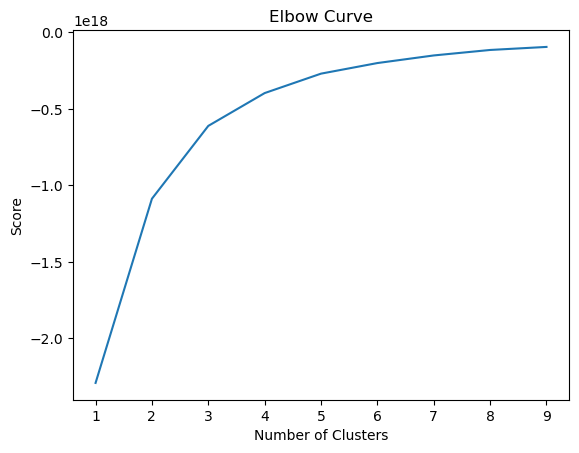

In [37]:
# Plotting the elbow 

pl.plot(num_cl,elbow)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

Based on the above graph it appears that the jump from 3 to 4 is far larger than from 4 to 5, leading me to believe that 4 is our elbow.

## Section 3 - K-Means Clustering

In [39]:
# Creating the K-Means object
kmeans = KMeans(n_clusters = 4)

In [40]:
# Fitting the k-means object to the data
kmeans.fit(df_num)

G:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

In [41]:
df['clusters'] = kmeans.fit_predict(df_num)

G:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [42]:
df.head()

,bed,bath,acre_lot,city,state,zip_code,house_size,price,clusters
0,2.0,1.0,0.34,Agawam,Massachusetts,1001.0,676.0,180000.0,0
1,2.0,2.0,0.00,Agawam,Massachusetts,1001.0,892.0,169900.0,0
2,2.0,2.0,0.00,Agawam,Massachusetts,1001.0,1428.0,242000.0,0
3,2.0,2.0,0.00,Agawam,Massachusetts,1001.0,1659.0,299950.0,0
4,3.0,1.0,0.46,Agawam,Massachusetts,1001.0,1196.0,239900.0,0


In [43]:
# The clusters look a little low in the head, so let's double-check they worked
df['clusters'].value_counts(dropna= False)

0    663638
2     47221
3      4861
1       510
Name: clusters, dtype: int64

Works for me!

## Section 4 - K-Means Visualizations

With our k-means established and our data now clustered, time to make some visualizations!

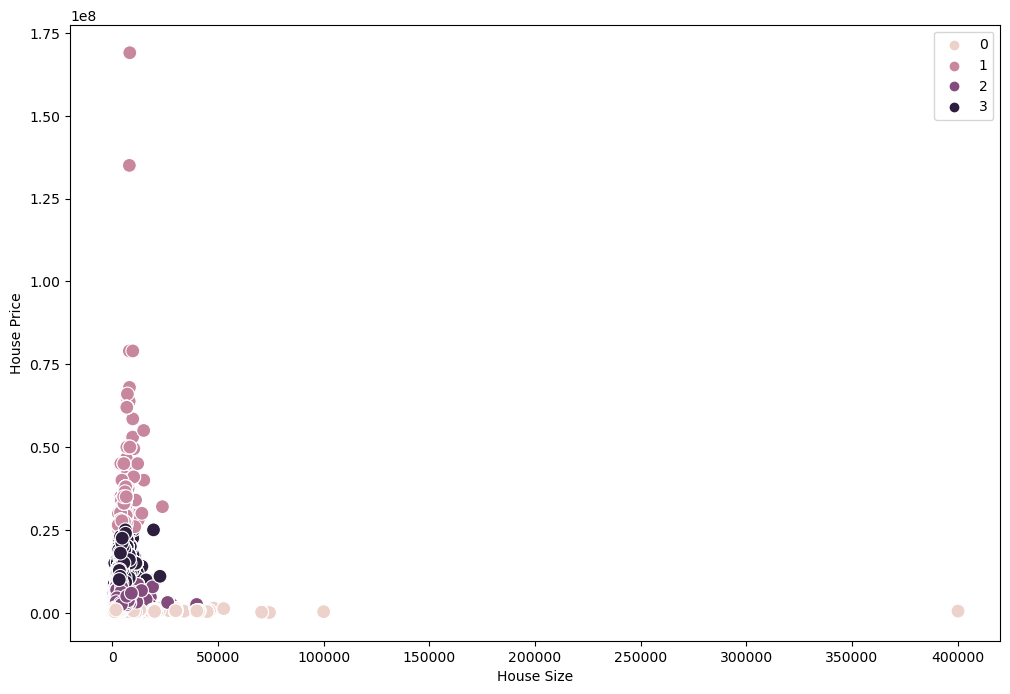

In [44]:
# Scatterplot of Price and House Size

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['house_size'], y=df['price'], hue=kmeans.labels_, s=100) 

ax.grid(False) 
plt.xlabel('House Size') 
plt.ylabel('House Price') 
plt.show()

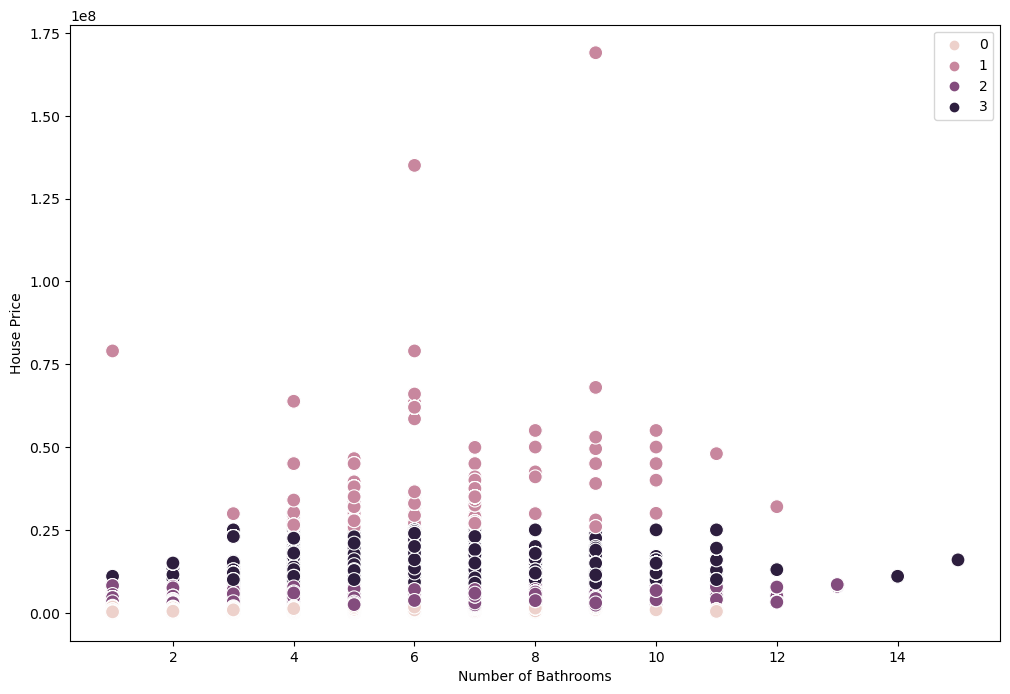

In [45]:
# Scatterplot of Price and Number of Bathrooms

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['bath'], y=df['price'], hue=kmeans.labels_, s=100) 

ax.grid(False) 
plt.xlabel('Number of Bathrooms') 
plt.ylabel('House Price') 
plt.show()

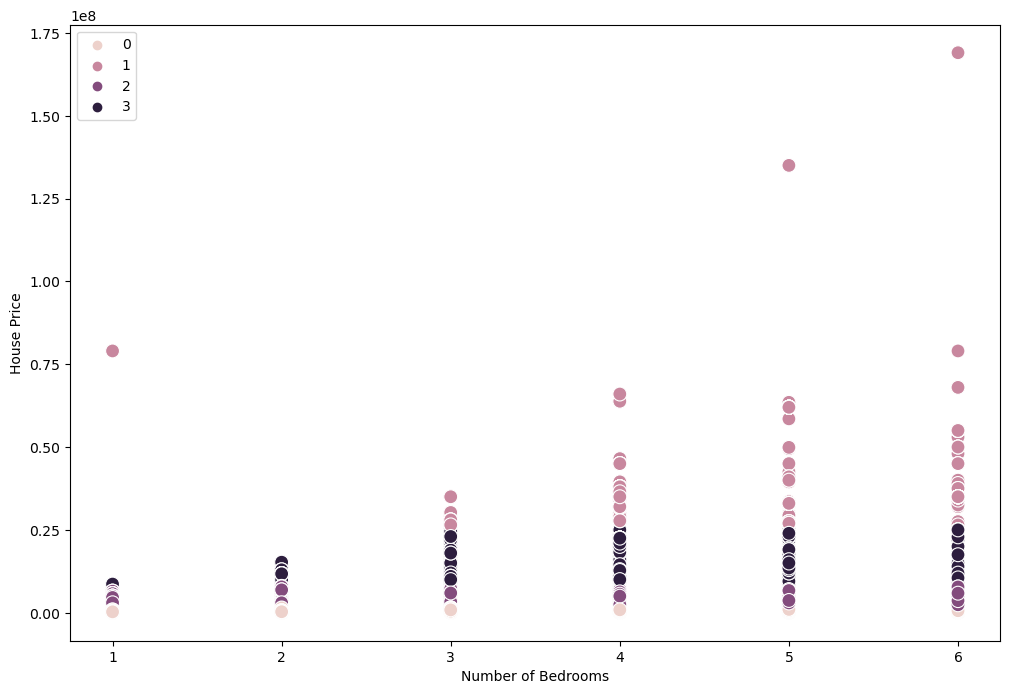

In [46]:
# Scatterplot of Price and Number of Bedrooms

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['bed'], y=df['price'], hue=kmeans.labels_, s=100) 

ax.grid(False) 
plt.xlabel('Number of Bedrooms') 
plt.ylabel('House Price') 
plt.show()

Based on the above graphs it looks like the groups are based largely on the house prices, creating a sort of tiered grouping. What does not make sense to me is that cluster 3 would logiaclly be the group with the highest prices, but it seems that this group is made up of the second-most expensive houses.

This could mean that the cluster number does not correspond with the size of the price (such as 0 being the lowest price and 3 being the highest), but instead is an arbitrary number for the group.

## Section 5 - Using Groupby for Statistics

In [49]:
# Using df.loc to group the clusters
df.loc[df['clusters'] == 3, 'cluster'] = '3'
df.loc[df['clusters'] == 2, 'cluster'] = '2'
df.loc[df['clusters'] == 1, 'cluster'] = '1'
df.loc[df['clusters'] == 0, 'cluster'] = '0'

In [50]:
# Creating statistics for the clusters
df.groupby('cluster').agg({'bed':['mean', 'median'], 
                         'bath':['mean', 'median'], 
                         'house_size':['mean', 'median'],
                          'price':['mean', 'median']})

bed             bath          house_size                 price  \
             mean median      mean median         mean  median          mean   
cluster                                                                        
0        2.989271    3.0  2.234233    2.0  1847.512999  1550.0  5.918495e+05   
1        4.519608    5.0  5.888016    6.0  5828.789357  5700.0  3.819523e+07   
2        3.557146    3.0  3.882965    3.0  3242.474812  2459.0  3.661655e+06   
3        4.328533    4.0  5.503404    5.0  5208.453977  4346.0  1.342853e+07   

                     
             median  
cluster              
0          479900.0  
1        35000000.0  
2         3150000.0  
3        12000000.0

Using these statistics seems to reinforce the idea raised in the previous exercises that there may not be a correlation between the number of bathrooms, bedrooms, and the size of the house on the price.

My hope is that future lesssons will be able to find a pattern in this data that I have so far not been able to draw out.